# Project 2:  EDA and Data Munging with Pandas

## 1) Data Overview

#### Data description.

The data is a record of passengers from the Titanic, with columns to describe details known about them such as their name, age, if they survived or not, social class, point of embarquement, family on board, and more. 

The second dataset is similar, but about another famouns shipwreck, the Lusitania. 

#### Data columns, value ranges.

Titanic: 
Sex: 1, 2, possibly an unknown
Age: 0.5 - 85
SibSP: 0 - 10
Parch: 0 - 10

Lusitania: 
'Family name'
'Title'
'Personal name'
'Fate'
'Age'
'Department/Class'
'Passenger/Crew'
'Citizenship'
'Position'
'Status'
'City'
'County'
'State'
'Country'
'Lifeboat'
'Rescue Vessel'
'Body No.'
'Ticket No.'
'Cabin No.'
'Traveling Companions and other notes'
'Value'
'Adult/Minor'
'Sex'


## 2) Read in data

In [2]:
import pandas as pd
import numpy as np

titanic = pd.read_csv("assets/titanic.csv", header = 0)
lusi = pd.read_csv("assets/lusitania.csv", header = 0)

In [4]:
#Preliminary data exploration 
titanic['name'].isnull().sum()
titanic.iloc[0:100, :]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
5,1,1,"Anderson, Mr. Harry",male,48.00,0,0,19952,26.5500,E12,S,3,NaN,"New York, NY"
6,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.00,1,0,13502,77.9583,D7,S,10,NaN,"Hudson, NY"
7,1,0,"Andrews, Mr. Thomas Jr",male,39.00,0,0,112050,0.0000,A36,S,NaN,NaN,"Belfast, NI"
8,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.00,2,0,11769,51.4792,C101,S,D,NaN,"Bayside, Queens, NY"
9,1,0,"Artagaveytia, Mr. Ramon",male,71.00,0,0,PC 17609,49.5042,NaN,C,NaN,22.0,"Montevideo, Uruguay"


#### Check column values 

In [7]:
titanic['age'].min()

0.17000000000000001

In [8]:
titanic['age'].max()

80.0

Neither of the above ages in range seems too outlandish. The lower age is oddly specific, possibly a data quality error, but not too bad of a red flag (like a negative number would have been). 

#### NaN handling

In [9]:
##calculate all missing values in the data frame and add them up as a table...
titanic.isnull().sum()

pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

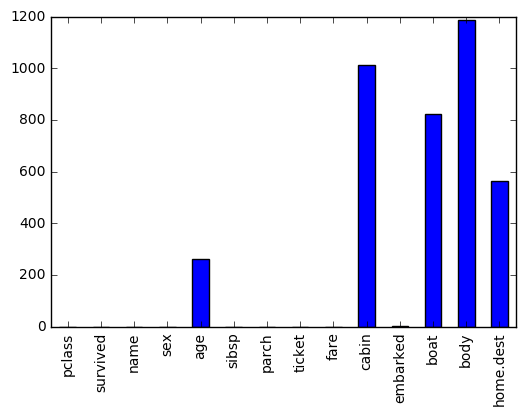

In [20]:
### also check them out visually...
import matplotlib as mpl
%matplotlib inline 

titanic.isnull().sum().plot(kind = 'bar')

#### Based on the above... let's impute!

We have a majority of values for age, as evidenced in the two exploratory data analysis queries above. Additionally, we have meaningful categories by which to split the total population and impute alternative age values for those missing. It makes sense to do so.

## 3) data imputation

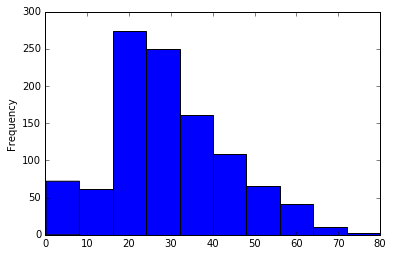

In [15]:
### check out the distribution of ages present

titanic.age.plot(kind = "hist",  bins = 10)

#### Age imputation strategy. 

It makes sense to try to group the passengers with missing age values by other meaningful groups for which tehy do have data. In the case of this population and historical moment, we can reasonably infer details about the passengers' age from his/her title. Since every passenger has a "name" string, this seems like a good bet. 

In [21]:
### Extract title element from "name" string given in the data. 

title_type=[]
for i in titanic["name"]:
    if ("Mlle." in i) or ("Miss" in i) or ("Ms." in i):
        title_type.append("Miss_Mlle")
    elif "Col." in i:
        title_type.append("Col")
    elif "Mr." in i:
        title_type.append("Mr")
    elif ("Mrs." in i) or ("Mme" in i):
        title_type.append("Mrs_Mme")
    elif "Master" in i:
        title_type.append("Master")
    elif "Dr." in i:
        title_type.append("Dr")
    else:
        title_type.append("Other")
        


In [22]:
#check that it has extracted one for each passenger
len(title_type)

#look at a few and make sure nothing looks fishy...
title_type[0:5]

['Miss_Mlle', 'Master', 'Miss_Mlle', 'Mr', 'Mrs_Mme']

In [23]:
#Add a new column to our raw data frame with the results
titanic["titles"] = pd.Series(title_type)


In [24]:
###Make the new column into a category type variable
titanic["titles"] = titanic["titles"].astype("category")
titanic.dtypes

pclass          int64
survived        int64
name           object
sex            object
age           float64
sibsp           int64
parch           int64
ticket         object
fare          float64
cabin          object
embarked       object
boat           object
body          float64
home.dest      object
titles       category
dtype: object

In [25]:
##use the mean of these title groups to impute missing age values in raw data
titanic["age"].fillna(titanic.groupby("titles")["age"].transform("mean"), inplace=True)

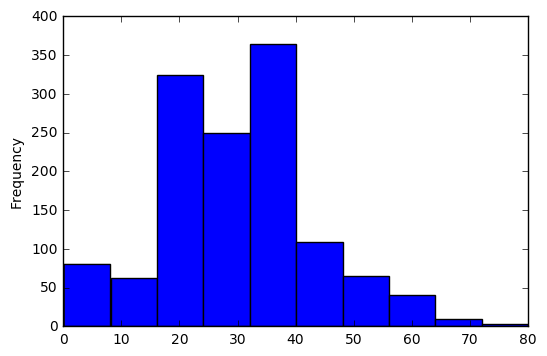

In [26]:
### scope out the new age distributions...
titanic.age.plot(kind = "hist", bins = 10)

In [27]:
### See if we missed any
titanic.age.isnull().sum()

0

Great, now let's move on to some analytics...

## 4) Group Statistics

#### What groups were particularly adversely affected in the Titanic wreck? 

In [28]:
#### Make pivot of title groups' survival averages, since we are aggregating by count, I am going to use a column for which I know I have a count for every row, "name" to subset the columns.
title_rates = titanic.pivot_table(index =['titles'], columns = ['survived'], aggfunc = len)["name"]


In [29]:
### Let's make these survival percents more explicit by cleaning up the columns
title_rates['all'] = title_rates[0] + title_rates[1]
title_rates['perc_lived'] = title_rates[1]/title_rates['all']*100

In [30]:
title_rates

survived,0,1,all,perc_lived
titles,,,,
Col,2.0,2.0,4.0,50.000000
Dr,4.0,4.0,8.0,50.000000
Master,30.0,31.0,61.0,50.819672
Miss_Mlle,85.0,179.0,264.0,67.803030
Mr,634.0,123.0,757.0,16.248349
Mrs_Mme,42.0,156.0,198.0,78.787879
Other,12.0,5.0,17.0,29.411765


Interesting, I'm going to add gender as a dimension to my analysis so these title categories will organize themselves a little more cleanly. 

In [31]:
title_gender_rates = titanic.pivot_table(index =['sex', 'titles'], columns = ['survived'], aggfunc = len)["name"]
#give zeroes for nas here to do accurate aggregation math on cols below
title_gender_rates.fillna(value = 0, inplace = True) 

In [32]:
title_gender_rates['survival_rate'] = title_gender_rates[1]/((title_gender_rates[1] + title_gender_rates[0]))*100
title_gender_rates

survived              0      1  survival_rate
sex    titles                                
female Col          0.0    0.0            NaN
       Dr           0.0    1.0     100.000000
       Master       0.0    0.0            NaN
       Miss_Mlle   85.0  179.0      67.803030
       Mr           0.0    0.0            NaN
       Mrs_Mme     42.0  156.0      78.787879
       Other        0.0    3.0     100.000000
male   Col          2.0    2.0      50.000000
       Dr           4.0    3.0      42.857143
       Master      30.0   31.0      50.819672
       Miss_Mlle    0.0    0.0            NaN
       Mr         634.0  123.0      16.248349
       Mrs_Mme      0.0    0.0            NaN
       Other       12.0    2.0      14.285714

Yikes, looks like it's rough going to be a "Mr.". Looks like there are a few women who fall into our "other" title category with really high rates if survival. I'm going to pursue a hunch that they are the rich ones and add "class" into our matrix.  

In [33]:
all_three = titanic.pivot_table(index =[ 'sex', 'titles', "pclass"], columns = ['survived'], aggfunc = len)["name"]
all_three.fillna(value = 0, inplace = True)
all_three

survived                     0     1
sex    titles    pclass             
female Col       1         0.0   0.0
                 2         0.0   0.0
                 3         0.0   0.0
       Dr        1         0.0   1.0
                 2         0.0   0.0
                 3         0.0   0.0
       Master    1         0.0   0.0
                 2         0.0   0.0
                 3         0.0   0.0
       Miss_Mlle 1         3.0  59.0
                 2         3.0  48.0
                 3        79.0  72.0
       Mr        1         0.0   0.0
                 2         0.0   0.0
                 3         0.0   0.0
       Mrs_Mme   1         2.0  76.0
                 2         9.0  46.0
                 3        31.0  34.0
       Other     1         0.0   3.0
                 2         0.0   0.0
                 3         0.0   0.0
male   Col       1         2.0   2.0
                 2         0.0   0.0
                 3         0.0   0.0
       Dr        1         2.0   3.0
                 2         2.0   0.0
                 3         0.0   0.0
       Master    1         0.0   5.0
                 2         0.0  11.0
                 3        30.0  15.0
       Miss_Mlle 1         0.0   0.0
                 2         0.0   0.0
                 3         0.0   0.0
       Mr        1       110.0  49.0
                 2       136.0  14.0
                 3       388.0  60.0
       Mrs_Mme   1         0.0   0.0
                 2         0.0   0.0
                 3         0.0   0.0
       Other     1         4.0   2.0
                 2         8.0   0.0
                 3         0.0   0.0

In [34]:
####Let's take a quick look at these "others" who survived...

list_others = []
for ii, x in enumerate(titanic['titles']):
    if x =="Other":
        list_others.append(ii)
        print ii
    else:
        pass


45
81
99
100
218
231
234
245
299
335
357
366
431
472
476
507
532


In [37]:
[titanic['name'].ix[i,:] for i in list_others]

['Butt, Major. Archibald Willingham',
 'Crosby, Capt. Edward Gifford',
 'Duff Gordon, Lady. (Lucille Christiana Sutherland) ("Mrs Morgan")',
 'Duff Gordon, Sir. Cosmo Edmund ("Mr Morgan")',
 'Oliva y Ocana, Dona. Fermina',
 'Peuchen, Major. Arthur Godfrey',
 'Reuchlin, Jonkheer. John George',
 'Rothes, the Countess. of (Lucy Noel Martha Dyer-Edwards)',
 'Uruchurtu, Don. Manuel E',
 'Bateman, Rev. Robert James',
 'Byles, Rev. Thomas Roussel Davids',
 'Carter, Rev. Ernest Courtenay',
 'Harper, Rev. John',
 'Kirkland, Rev. Charles Leonard',
 'Lahtinen, Rev. William',
 'Montvila, Rev. Juozas',
 'Peruschitz, Rev. Joseph Maria']

Looks like a "Countess" "Lady" and "Dona" (portugese equiv of "Madam") aka titles indicating high social class were overlooked the list of potential titles I hard coded into my if/else cascade. (Next time I'll use regex). They are likely the 3 first class ladies with irregular titles who all survived. 

### Now let's check out a few other group survival rates...

In [38]:
#Are there noteworthy differences amongst survival rates of people who embarqued in different places?

emb_rates = titanic.pivot_table(index =['embarked'], columns = ['survived'], aggfunc = len)["name"]
emb_rates['perc_lived'] = (emb_rates[1]/(emb_rates[1] + emb_rates[0]))*100
emb_rates

survived,0,1,perc_lived
embarked,,,
C,120.0,150.0,55.555556
Q,79.0,44.0,35.772358
S,610.0,304.0,33.260394


Wow, looks like people who got on in Cherbourg lived way more often than those in other ports, let's dig deeper by adding class as a dimension...

In [39]:
embarc_rates = titanic.pivot_table(index =['embarked', "pclass"], columns = ['survived'], aggfunc = len)["name"]

In [40]:
embarc_rates['all'] = embarc_rates[0] + embarc_rates[1]

In [41]:
embarc_rates['perc_lived'] = embarc_rates[1]/embarc_rates['all']*100

In [42]:
embarc_rates

survived             0      1    all  perc_lived
embarked pclass                                 
C        1        44.0   97.0  141.0   68.794326
         2        12.0   16.0   28.0   57.142857
         3        64.0   37.0  101.0   36.633663
Q        1         1.0    2.0    3.0   66.666667
         2         5.0    2.0    7.0   28.571429
         3        73.0   40.0  113.0   35.398230
S        1        78.0   99.0  177.0   55.932203
         2       141.0  101.0  242.0   41.735537
         3       391.0  104.0  495.0   21.010101

It looks like the low scores for Queenstown and Southampton are weighted heavily by the fact that so many lower class individuals got on board in those locations relative to the total population who embarqued there. No matter where you got on, it looks like your probability of surviving is linked very consistently to your class. 

In [43]:
##pivot on family structure, specifically parents/children and sib/sp
sibsp_rates = titanic.pivot_table(index =['pclass', 'sibsp'], columns = ['survived'], aggfunc = len)["name"]
sibsp_rates.fillna(value = 0, inplace = True)
sibsp_rates['all'] = sibsp_rates[0] + sibsp_rates[1]
sibsp_rates['perc_lived'] = sibsp_rates[1]/sibsp_rates['all']*100
sibsp_rates

survived          0      1    all  perc_lived
pclass sibsp                                 
1      0       87.0  111.0  198.0   56.060606
       1       34.0   79.0  113.0   69.911504
       2        1.0    7.0    8.0   87.500000
       3        1.0    3.0    4.0   75.000000
2      0      113.0   69.0  182.0   37.912088
       1       39.0   43.0   82.0   52.439024
       2        6.0    6.0   12.0   50.000000
       3        0.0    1.0    1.0  100.000000
3      0      382.0  129.0  511.0   25.244618
       1       83.0   41.0  124.0   33.064516
       2       16.0    6.0   22.0   27.272727
       3       13.0    2.0   15.0   13.333333
       4       19.0    3.0   22.0   13.636364
       5        6.0    0.0    6.0    0.000000
       8        9.0    0.0    9.0    0.000000

In [44]:
parch_rates=  titanic.pivot_table(index =["pclass",'parch'], columns = ['survived'], aggfunc = len)['name']
parch_rates.fillna(value = 0, inplace = True)
parch_rates['all'] = parch_rates[0] + parch_rates[1]
parch_rates["perc_lived"] = parch_rates[1]/parch_rates['all']*100
parch_rates

survived          0      1    all  perc_lived
pclass parch                                 
1      0      101.0  141.0  242.0   58.264463
       1       14.0   36.0   50.0   72.000000
       2        6.0   21.0   27.0   77.777778
       3        1.0    1.0    2.0   50.000000
       4        1.0    1.0    2.0   50.000000
2      0      142.0   64.0  206.0   31.067961
       1       12.0   31.0   43.0   72.093023
       2        4.0   21.0   25.0   84.000000
       3        0.0    3.0    3.0  100.000000
3      0      423.0  131.0  554.0   23.646209
       1       44.0   33.0   77.0   42.857143
       2       46.0   15.0   61.0   24.590164
       3        2.0    1.0    3.0   33.333333
       4        4.0    0.0    4.0    0.000000
       5        5.0    1.0    6.0   16.666667
       6        2.0    0.0    2.0    0.000000
       9        2.0    0.0    2.0    0.000000

The above two pivot tables suggest there is some truth to the "and children" part of women and children first...as long as you aren't in third class. First of all, families are larger in third class, in the siblings/spouse category we see that no one in first or second calss even had more than three family members in those categories on board. First and second class both show relatively high survival rates for those with more than zero family members. Third class shows a mild uptick for individuals with a par/child calue of more than zero, but then has a high penalty in terms of survival rate for those with large families. 

Whether or not women and children go first, you see a penalty in every class for being child/parent-less. A summary statement of survival by class below. 

In [45]:
class_rates = titanic.pivot_table(index =['pclass'], columns = ['survived'], aggfunc = len)['name']
class_rates['all'] = class_rates[0] + class_rates[1]
class_rates['perc_lived'] = class_rates[1]/class_rates['all']*100
class_rates

survived,0,1,all,perc_lived
pclass,,,,
1,123.0,200.0,323.0,61.919505
2,158.0,119.0,277.0,42.960289
3,528.0,181.0,709.0,25.528914


#### Outperforming groups:


While you can't improve the 100% survival rate of 1st class ladies with high status titles, individuals in 1st or 2nd class with parents or children did comparatively well. Third class passengers with more than 1 par/ch relationship show a steep penalty. Generally speaking, people in higher classes with some children fared best.

## 5) Comparative Statistics:  Lusitania

#### Are there any groups that were especially adversely affected in the Lusitania wreck? (justify your response numerically)

In [46]:
titles_l = lusi.pivot_table(index = ['Title'], columns = ['Fate'], aggfunc = len)["Family name"]
titles_l.fillna(value = 0, inplace = True)
titles_l['lived'] = titles_l['Saved'] + titles_l['Not on board'] 
titles_l['died'] = titles_l["Lost"] + titles_l["Saved (died from trauma)"]
titles_l = titles_l.drop(['Not on board', 'Saved', "Lost", "Saved (died from trauma)"], axis =1)
titles_l['perc_survive'] = (titles_l['lived']/(titles_l['lived'] + titles_l['died']))*100
titles_l


Fate,lived,died,perc_survive
Title,,,
Captain,1.0,2.0,33.333333
Commander,0.0,1.0,0.000000
Detective-Inspector,1.0,0.0,100.000000
Dr.,7.0,4.0,63.636364
Father,0.0,1.0,0.000000
Lady,2.0,0.0,100.000000
Lieutenant,1.0,1.0,50.000000
Master,35.0,61.0,36.458333
Master (?),0.0,4.0,0.000000


In [47]:
titles_2 = lusi.pivot_table(index = ['Title',"Department/Class"], columns = ['Fate'], aggfunc = len)["Family name"]
titles_2.fillna(value = 0, inplace = True)
titles_2['lived'] = titles_2['Saved'] + titles_2['Not on board'] 
titles_2['died'] = titles_2["Lost"] + titles_2["Saved (died from trauma)"]
titles_2 = titles_2.drop(['Not on board', 'Saved', "Lost", "Saved (died from trauma)"], axis =1)
titles_2['perc_survive'] = (titles_2['lived']/(titles_2['lived'] + titles_2['died']))*100
titles_2


Fate                                                   lived   died  \
Title               Department/Class                                  
Captain             Deck                                 1.0    0.0   
                    Saloon                               0.0    2.0   
Commander           Saloon                               0.0    1.0   
Detective-Inspector Saloon                               1.0    0.0   
Dr.                 Deck                                 0.0    2.0   
                    Saloon                               3.0    1.0   
                    Second                               4.0    0.0   
                    Third                                0.0    1.0   
Father              Saloon                               0.0    1.0   
Lady                Saloon                               2.0    0.0   
Lieutenant          Saloon                               1.0    0.0   
                    Second                               0.0    1.0   
Master              Deck                                 0.0    1.0   
                    Engineering                          0.0    1.0   
                    Saloon                               2.0   10.0   
                    Second                              18.0   30.0   
                    Third                                9.0   18.0   
                    Victualling                          6.0    1.0   
Master (?)          Victualling                          0.0    4.0   
Miss                Saloon                              13.0   21.0   
                    Second                              48.0   90.0   
                    Third                               19.0   32.0   
                    Victualling                          4.0   11.0   
Mr.                 Band                                 3.0    2.0   
                    Deck                                36.0   29.0   
                    Engineering                        112.0  200.0   
                    Saloon                              68.0  105.0   
                    Second                              92.0  154.0   
                    Third                               85.0  149.0   
                    Third (Distressed British Seaman)    0.0    3.0   
Mr.                 Stowaway                             0.0    3.0   
                    Victualling                        123.0  147.0   
Mr. (later Sir)     Saloon                               1.0    0.0   
Mrs.                Saloon                              20.0   35.0   
                    Second                              60.0   95.0   
                    Third                               21.0   36.0   
                    Victualling                          5.0    5.0   
Professor           Saloon                               0.0    1.0   
                    Second                               2.0    0.0   
Reverend            Saloon                               1.0    0.0   
                    Second                               3.0    3.0   
Sir                 Saloon                               0.0    1.0   
Sister              Second                               0.0    1.0   
Surgeon-Major       Saloon                               1.0    0.0   

Fate                                                   perc_survive  
Title               Department/Class                                 
Captain             Deck                                 100.000000  
                    Saloon                                 0.000000  
Commander           Saloon                                 0.000000  
Detective-Inspector Saloon                               100.000000  
Dr.                 Deck                                   0.000000  
                    Saloon                                75.000000  
                    Second                               100.000000  
                    Third                                  0.000000  
Father              Saloon       

In [48]:
titles_3 = lusi.pivot_table(index = ['Title',"Passenger/Crew"], columns = ['Fate'], aggfunc = len)["Family name"]
titles_3.fillna(value = 0, inplace = True)
titles_3['lived'] = titles_3['Saved'] + titles_3['Not on board'] 
titles_3['died'] = titles_3["Lost"] + titles_3["Saved (died from trauma)"]
titles_3 = titles_3.drop(['Not on board', 'Saved', "Lost", "Saved (died from trauma)"], axis =1)
titles_3['perc_survive'] = (titles_3['lived']/(titles_3['lived'] + titles_3['died']))*100
titles_3

Fate                                lived   died  perc_survive
Title               Passenger/Crew                            
Captain             Crew              1.0    0.0    100.000000
                    Passenger         0.0    2.0      0.000000
Commander           Passenger         0.0    1.0      0.000000
Detective-Inspector Passenger         1.0    0.0    100.000000
Dr.                 Crew              0.0    2.0      0.000000
                    Passenger         7.0    2.0     77.777778
Father              Passenger         0.0    1.0      0.000000
Lady                Passenger         2.0    0.0    100.000000
Lieutenant          Passenger         1.0    1.0     50.000000
Master              Crew              6.0    3.0     66.666667
                    Passenger        29.0   58.0     33.333333
Master (?)          Crew              0.0    4.0      0.000000
Miss                Crew              4.0   11.0     26.666667
                    Passenger        80.0  143.0     35.874439
Mr.                 Crew            151.0  231.0     39.528796
                    Passenger       245.0  411.0     37.347561
Mr.                 Crew            123.0  147.0     45.555556
                    Stowaway          0.0    3.0      0.000000
Mr. (later Sir)     Passenger         1.0    0.0    100.000000
Mrs.                Crew              5.0    5.0     50.000000
                    Passenger       101.0  166.0     37.827715
Professor           Passenger         2.0    1.0     66.666667
Reverend            Passenger         4.0    3.0     57.142857
Sir                 Passenger         0.0    1.0      0.000000
Sister              Passenger         0.0    1.0      0.000000
Surgeon-Major       Passenger         1.0    0.0    100.000000

It looks like there is considerably less information to be gleaned from the title/class categories than on Titanic since both classifications are more disperse. Also, we now have more information about the passengers' likelihood of survival based on their stats as employees vs patrons...

In [49]:
#cleanse age data
import numpy as np


###our holdover cleansing functions...
def is_number(s):
    try:
        float(s)
        return True
    except ValueError:
        return False
    
##original 
def clean_it(s):
    output = ''
    for elm in str(s):
        if is_number(elm):
            output+=elm
        else:
            pass
    if output!= '':
        return output
    else:
        return np.nan
###clean age column
lusi['Age'] = lusi['Age'].apply(clean_it)

lusi['Age'].astype("float")

0       38.0
1       37.0
2       30.0
3       25.0
4       27.0
5       48.0
6        NaN
7        NaN
8       24.0
9       19.0
10      57.0
11      50.0
12       NaN
13       NaN
14       NaN
15       NaN
16       NaN
17       NaN
18       NaN
19       NaN
20       NaN
21       NaN
22       NaN
23      25.0
24       NaN
25      56.0
26       NaN
27      41.0
28       NaN
29       NaN
        ... 
1931    44.0
1932     NaN
1933     NaN
1934     NaN
1935     NaN
1936     NaN
1937    27.0
1938     NaN
1939     NaN
1940     NaN
1941     NaN
1942    51.0
1943     NaN
1944    23.0
1945     NaN
1946     NaN
1947     NaN
1948     NaN
1949     NaN
1950     NaN
1951     NaN
1952     NaN
1953     NaN
1954    31.0
1955    35.0
1956     NaN
1957     NaN
1958     NaN
1959    16.0
1960    37.0
Name: Age, dtype: float64

In [50]:
###clean this all up, aggregate columns
class_fate = lusi.pivot_table(index = ['Department/Class'], columns = ['Fate'], aggfunc = len)["Family name"]
class_fate.fillna(value = 0, inplace = True)
class_fate['lived'] = class_fate['Saved'] + class_fate['Not on board'] 
class_fate['died'] = class_fate["Lost"] + class_fate["Saved (died from trauma)"]
class_fate1 = class_fate.drop(['Not on board', 'Saved', "Lost", "Saved (died from trauma)"], axis =1)
class_fate1['perc_survive'] = (class_fate1['lived']/(class_fate1['lived'] + class_fate1['died']))*100
class_fate1

Fate,lived,died,perc_survive
Department/Class,,,
Band,3.0,2.0,60.000000
Deck,37.0,32.0,53.623188
Engineering,112.0,201.0,35.782748
Saloon,113.0,178.0,38.831615
Second,227.0,374.0,37.770383
Stowaway,0.0,3.0,0.000000
Third,134.0,236.0,36.216216
Third (Distressed British Seaman),0.0,3.0,0.000000
Victualling,138.0,168.0,45.098039


In [51]:
pcam = lusi.pivot_table(index = ['Passenger/Crew', 'Adult/Minor' ], columns = ['Fate'], aggfunc = len)["Family name"]

In [52]:
pcam.fillna(value = 0, inplace = True)
pcam['lived'] = pcam['Saved'] + pcam['Not on board'] 
pcam['died'] = pcam["Lost"] + pcam["Saved (died from trauma)"]
pcam = pcam.drop(['Not on board', 'Saved', "Lost", "Saved (died from trauma)"], axis =1)
pcam['perc_survive'] = (pcam['lived']/(pcam['lived'] + pcam['died']))*100
pcam

Fate                        lived   died  perc_survive
Passenger/Crew Adult/Minor                            
Crew           Adult        284.0  394.0     41.887906
               Minor          6.0    5.0     54.545455
               Minor?         0.0    4.0      0.000000
Passenger      Adult        422.0  688.0     38.018018
               Infant         9.0   38.0     19.148936
               Minor         43.0   65.0     39.814815
Stowaway       Adult          0.0    3.0      0.000000

#### Outperforming groups:


On the Lusitania, Minors on the crew were most likely to survive, followed closely by adults on the crew and Minors who are passengers. 

#### Conclusions:

The groupwise survival rate suggests that the Lusitania had less room for human intervention and selection saving lives. Since the Titanic had too few lifeboats and a large population to use them, populations deemed "most worthy" of them were saved in larger numbers than others, ie (rich) parents and children. The Lusitania resulted in the death of almost 40 passenger infants and over half of the populations of minors onboard. This suggests that there wasn't time for the human reckoning process of "worthiness" that would likely result in a higher percentage of youths saved. 